In [140]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
db = geopandas.read_file("data/sandiego_tracts.gpkg")
print("Data information", db.info())

cluster_variables = [
    "median_house_value",  # Median house value
    "pct_white",  # % tract population that is white
    "pct_rented",  # % households that are rented
    "pct_hh_female",  # % female-led households
    "pct_bachelor",  # % tract population with a Bachelors degree
    "median_no_rooms",  # Median n. of rooms in the tract's households
    "income_gini",  # Gini index measuring tract wealth inequality
    "median_age",  # Median age of tract population
    "tt_work",  # Travel time to work
]


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   GEOID                628 non-null    object  
 1   median_age           628 non-null    float64 
 2   total_pop            628 non-null    float64 
 3   total_pop_white      628 non-null    float64 
 4   tt_work              628 non-null    float64 
 5   hh_total             628 non-null    float64 
 6   hh_female            628 non-null    float64 
 7   total_bachelor       628 non-null    float64 
 8   median_hh_income     628 non-null    float64 
 9   income_gini          628 non-null    float64 
 10  total_housing_units  628 non-null    float64 
 11  total_rented         628 non-null    float64 
 12  median_no_rooms      628 non-null    float64 
 13  median_house_value   628 non-null    float64 
 14  NAME                 628 non-null    object  
 15  state          

In [127]:
db.head()

,GEOID,median_age,total_pop,total_pop_white,tt_work,hh_total,hh_female,total_bachelor,median_hh_income,income_gini,...,state,county,tract,area_sqm,pct_rented,pct_hh_female,pct_bachelor,pct_white,sub_30,geometry
0,06073007701,31.9,4074.0,3737.0,2243.0,4074.0,301.0,0.0,73019.0,0.4182,...,06,073,007701,0.568635,0.626149,0.073883,0.0,0.917280,False,"POLYGON ((-13052014.930 3867748.530, -13051974..."
1,06073008002,37.0,2968.0,2677.0,1558.0,2968.0,296.0,0.0,109224.0,0.4094,...,06,073,008002,1.091591,0.308863,0.099730,0.0,0.901954,False,"POLYGON ((-13052206.510 3870188.930, -13052193..."
2,06073007903,30.2,4660.0,4079.0,3100.0,4660.0,425.0,0.0,59781.0,0.4528,...,06,073,007903,0.757675,0.663439,0.091202,0.0,0.875322,False,"POLYGON ((-13051964.720 3869215.200, -13051923..."
3,06073008364,30.1,5811.0,3135.0,3169.0,5811.0,448.0,0.0,71629.0,0.3986,...,06,073,008364,0.989247,0.720193,0.077095,0.0,0.539494,False,"POLYGON ((-13050548.180 3875343.810, -13050522..."
4,06073008305,27.1,2002.0,1053.0,879.0,2002.0,152.0,0.0,37863.0,0.4797,...,06,073,008305,4.457771,0.866258,0.075924,0.0,0.525974,False,"POLYGON ((-13051530.240 3879241.240, -13051529..."


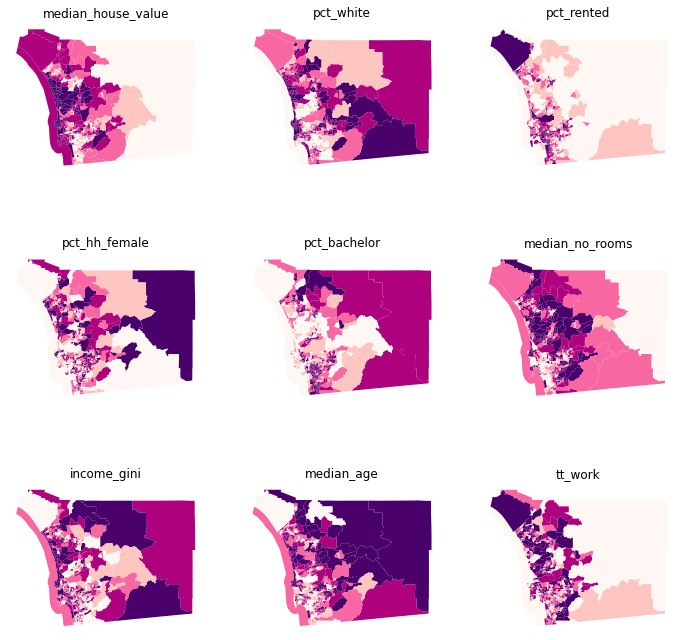

In [128]:
f, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(cluster_variables):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    db.plot(
        column=col,
        ax=ax,
        scheme="Quantiles",
        linewidth=0,
        cmap="RdPu",
    )
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()

### Pairplot

In [129]:
_ = sns.pairplot(
    db[cluster_variables], kind="reg", diag_kind="kde"
)

Error in callback <function flush_figures at 0x000001E2C4EC88B0> (for post_execute):


KeyboardInterrupt: 

#### Observation: 
1. The one variable that tends to have consistently weak association with the other variables is tt_work
2. Positive linear associations: median_age vs. median_house_value, median_house_value vs. median_no_rooms
3. Negative correlations: median_house_value vs. pct_rented, median_no_rooms vs. pct_rented, and median_age vs. pct_rented
4. consistently weak association with the other variables is **tt_work**: due to its concentrated distribution

Distances between datapoints are of paramount importance in clustering applications. In fact, (dis)similarity between observations is calculated as the statistical distance between themselves. Because distances are sensitive to the units of measurement, cluster solutions can change when you __re-scale__ your data.
- for example:
    - housing values are in the hundreds of thousands,
    - the Gini coefficient is constrained to fall between zero and one.
    - Conclusion: A clustering algorithm that uses this distance to determine classifications will pay a lot of attention to median house value, but very little to the Gini coefficient!

In [ ]:
# for example 
# housing values are in the hundreds of thousands,
# the Gini coefficient is constrained to fall between zero and one.
db[["income_gini", "median_house_value"]].head()

,income_gini,median_house_value
0,0.4182,852000.0
1,0.4094,893300.0
2,0.4528,423500.0
3,0.3986,601100.0
4,0.4797,517900.0


In [142]:
from sklearn import metrics
metrics.pairwise_distances(
    db[["income_gini", "median_house_value"]].head()
).round(4)

array([[     0.,  41300., 428500., 250900., 334100.],
       [ 41300.,      0., 469800., 292200., 375400.],
       [428500., 469800.,      0., 177600.,  94400.],
       [250900., 292200., 177600.,      0.,  83200.],
       [334100., 375400.,  94400.,  83200.,      0.]])

### Re-scaling data
- scale() method: subtracts the mean and divides by the standard deviation
- robust_scale() method:subtracts the median and divided by the inter-quartile range. (Q3-Q1)

In [143]:
from sklearn.preprocessing import robust_scale

In [144]:
db_scaled = robust_scale(db[cluster_variables])

### Deeper investigation:
1. To what extent these pair-wise relationships hold across different attributes? 
2. Are there patterns in the **location** of observations within the scatterplots.
    - For example, do nearby dots in each scatterplot of the matrix represent the same observations?

### Geodemographic Clusters in san diego census tracts:
The power of (geodemographic) clustering comes from taking statistical variation across several dimensions and compressing it into a single categorical one that we can visualize through a map, where each cluster is given a unique label.
- Method: k-means
    - fit on the scaled data
    - Labeled category will be appended to the original dataframe

In [145]:
from sklearn.cluster import KMeans

In [146]:
# Initialize KMeans instance
kmeans = KMeans(n_clusters=5)
# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(db_scaled)

In [147]:
# Print first five labels
# The profiles of the various clusters must be further explored by looking at the values of each dimension.
k5cls.labels_[:5]

array([3, 4, 3, 3, 3])

#### Spatial distribution of clusters
- It gives us one map that incorporates the information from all nine covariates.

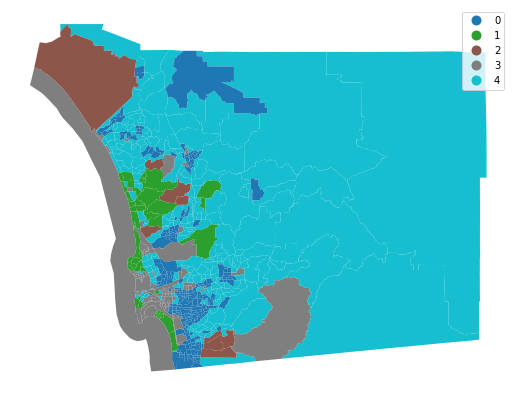

In [150]:
# Assign labels into a column
db["k5cls"] = k5cls.labels_
# Set up figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including
# a legend and with no boundary lines
db.plot(
    column="k5cls", categorical=True, legend=True, linewidth=0, ax=ax
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

In [151]:
db["k5cls"]

0      3
1      4
2      3
3      3
4      3
      ..
623    0
624    4
625    0
626    0
627    4
Name: k5cls, Length: 628, dtype: int32

In [153]:
# Group data table by cluster label and count observations
k5sizes = db[["hh_total", "k5cls"]].groupby(["k5cls"]).count().values[:,0]
k5sizes

array([244,  42,   9,  84, 249], dtype=int64)

- Use the dissolve operation in geopandas, which combines all tracts belonging to each cluster into a single polygon object. Then calculate the total land area of the cluster.

In [154]:
# Dissolve areas by Cluster, aggregate by summing over the area
areas = db.dissolve(by="k5cls", aggfunc="sum")["area_sqm"]
areas

k5cls
0     728.744304
1     353.634216
2     709.092775
3    1327.690649
4    8602.183213
Name: area_sqm, dtype: float64

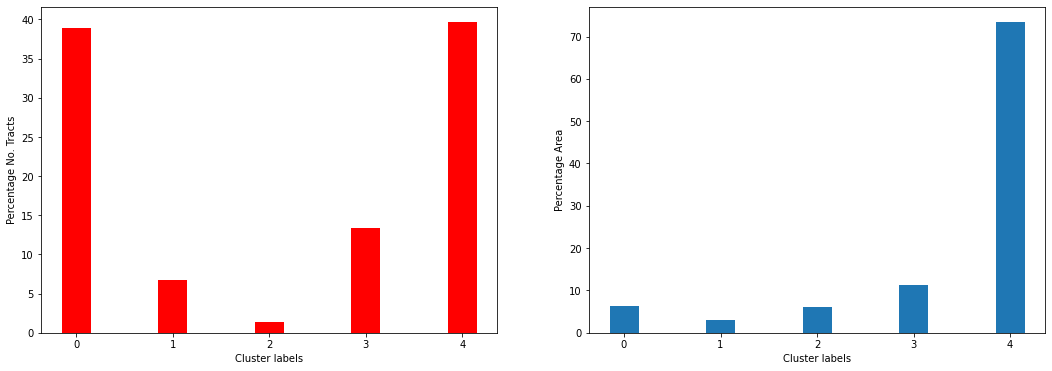

In [ ]:
%matplotlib inline
# Bind cluster figures in a single table
area_tracts = pd.DataFrame({"No. Tracts": k5sizes, "Area": areas})
# Convert raw values into percentages
area_tracts = area_tracts * 100 / area_tracts.sum()
area_tracts = area_tracts.reset_index()
# Bar plot

# Figure size
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
axes[0].bar(area_tracts['k5cls'], area_tracts['No. Tracts'], color='r', width=0.3)
axes[1].bar(area_tracts['k5cls'], area_tracts['Area'], width=0.3)
# Rename axes
axes[0].set_xlabel("Cluster labels")
axes[0].set_ylabel("Percentage No. Tracts")
axes[1].set_xlabel("Cluster labels")
axes[1].set_ylabel("Percentage Area")
plt.show()


#### Statistics of each variable by clusters
- To build a basic profile, we can compute the (unscaled) means of each of the attributes in every cluster
    - For interpretability, it is useful to consider the raw features, rather than scaled versions that the clusterer sees.

In [155]:
# Group table by cluster label, keep the variables used
# for clustering, and obtain their mean
k5means = db.groupby("k5cls")[cluster_variables].mean()
# Transpose the table and print it rounding each value to three decimals
k5means.T.round(3)

k5cls,0,1,2,3,4
median_house_value,356495.648,1261604.881,609385.655,535596.535,535468.273
pct_white,0.618,0.873,0.583,0.736,0.787
pct_rented,0.553,0.274,0.377,0.597,0.277
pct_hh_female,0.108,0.110,0.095,0.063,0.114
pct_bachelor,0.023,0.002,0.007,0.005,0.007
median_no_rooms,4.611,6.131,5.800,4.146,5.810
income_gini,0.399,0.487,0.391,0.449,0.397
median_age,32.723,46.169,33.500,32.426,41.850
tt_work,2232.549,1790.929,9671.556,2333.893,2255.888


<AxesSubplot:xlabel='median_house_value', ylabel='pct_white'>

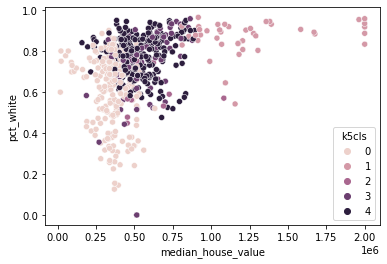

In [ ]:
import seaborn as sns
sns.scatterplot(data=db, x="median_house_value", y="pct_white", hue="k5cls")

<AxesSubplot:xlabel='median_house_value', ylabel='income_gini'>

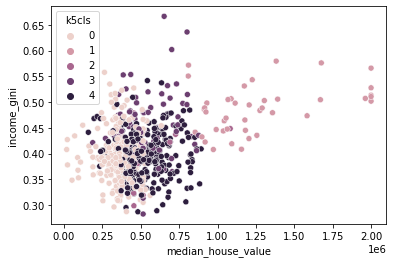

In [ ]:
import seaborn as sns
sns.scatterplot(data=db, x="median_house_value", y="income_gini", hue="k5cls")

In [ ]:
k5desc = db.groupby('k5cls')[cluster_variables].describe()
# Loop over each cluster and print a table with descriptives
for cluster in k5desc.T:
    print('\n---------\nCluster %i'%cluster)
    print(k5desc.T[cluster].unstack()) #from a long (or stacked) format to a wide format.


---------
Cluster 0
                    count           mean           std           min  \
median_house_value  244.0  356495.647817  99165.803214  17900.000000   
pct_white           244.0       0.617716      0.165421      0.126219   
pct_rented          244.0       0.553337      0.193380      0.134241   
pct_hh_female       244.0       0.107884      0.019454      0.051882   
pct_bachelor        244.0       0.022814      0.013431      0.000000   
median_no_rooms     244.0       4.610656      0.782189      2.900000   
income_gini         244.0       0.399297      0.048601      0.287600   
median_age          244.0      32.723361      4.103224     17.900000   
tt_work             244.0    2232.549180    716.427966    507.000000   

                              25%            50%            75%            max  
median_house_value  316250.000000  357700.000000  409250.000000  633700.000000  
pct_white                0.519564       0.662429       0.744970       0.902344  
pct_rented     

In [179]:
# Index db on cluster ID
tidy_db = db.set_index("k5cls")
tidy_db = tidy_db[cluster_variables]
# Stack column names into a column, obtaining a "long" version of the dataset
tidy_db = tidy_db.stack()
# Take indices into proper columns
tidy_db = tidy_db.reset_index()
# Rename column names
tidy_db = tidy_db.rename(
    columns={"level_1": "Attribute", 0: "Values"}
)
# Check out result
tidy_db.head()

,k5cls,Attribute,Values
0,3,median_house_value,852000.000000
1,3,pct_white,0.917280
2,3,pct_rented,0.626149
3,3,pct_hh_female,0.073883
4,3,pct_bachelor,0.000000


#### Dsitribution


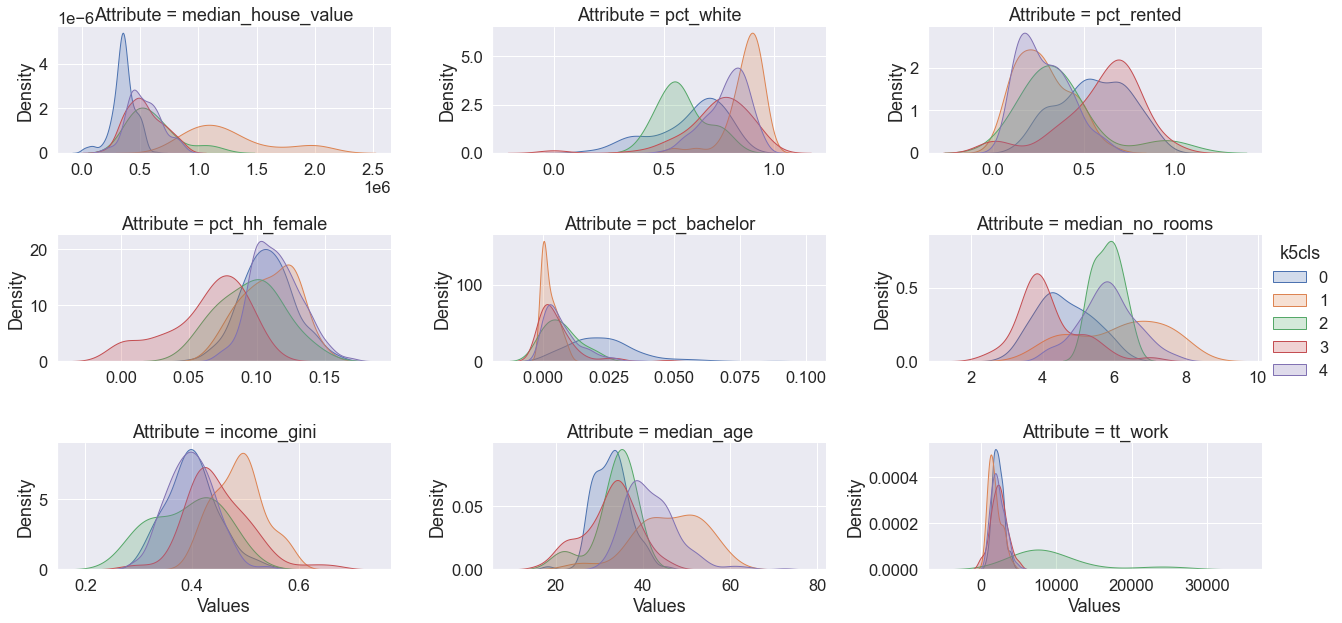

In [184]:
# Scale fonts to make them more readable
sns.set(font_scale=1.5)
# Setup the facets
facets = sns.FacetGrid(
    data=tidy_db,
    col="Attribute",
    hue="k5cls",
    sharey=False,
    sharex=False,
    aspect=2, # This sets the aspect ratio of the individual plots in the grid. An aspect ratio of 2 means that each plot will be twice as wide as it is tall.
    col_wrap=3, # number of columns for subplots
)
# Build the plot from `sns.kdeplot`
_ = facets.map(sns.kdeplot, "Values", shade=True).add_legend()

#### Conclusion from the plots
- **pct_hh_female** display largely the same distribution for each cluster, others paint a much more divided picture (e.g., **median_house_value**